In [ ]:
!pip install diffusers transformers torch torchvision matplotlib



In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def linear_beta_schedule(timesteps, beta_start=1e-4, beta_end=0.02):
    return np.linspace(beta_start, beta_end, timesteps)


In [4]:
def get_alpha_values(beta):
    alphas = 1.0 - beta
    alphas_cumprod = np.cumprod(alphas)
    return alphas, alphas_cumprod


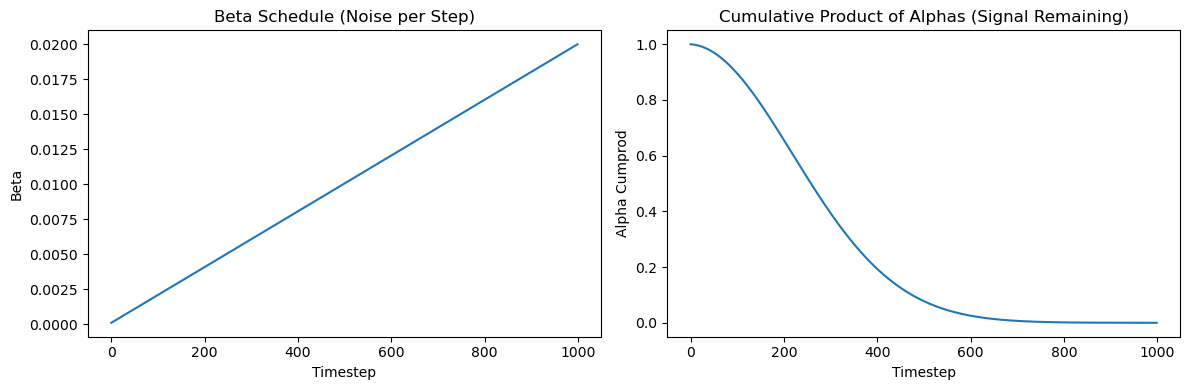

In [5]:
timesteps = 1000
beta = linear_beta_schedule(timesteps)
alphas, alphas_cumprod = get_alpha_values(beta)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(beta)
plt.title("Beta Schedule (Noise per Step)")
plt.xlabel("Timestep")
plt.ylabel("Beta")

plt.subplot(1, 2, 2)
plt.plot(alphas_cumprod)
plt.title("Cumulative Product of Alphas (Signal Remaining)")
plt.xlabel("Timestep")
plt.ylabel("Alpha Cumprod")

plt.tight_layout()
plt.show()


In [6]:
def forward_diffusion_sample(x0, t, alphas_cumprod):
    noise = np.random.randn(*x0.shape)
    alpha_t = alphas_cumprod[t]
    return np.sqrt(alpha_t) * x0 + np.sqrt(1 - alpha_t) * noise, noise


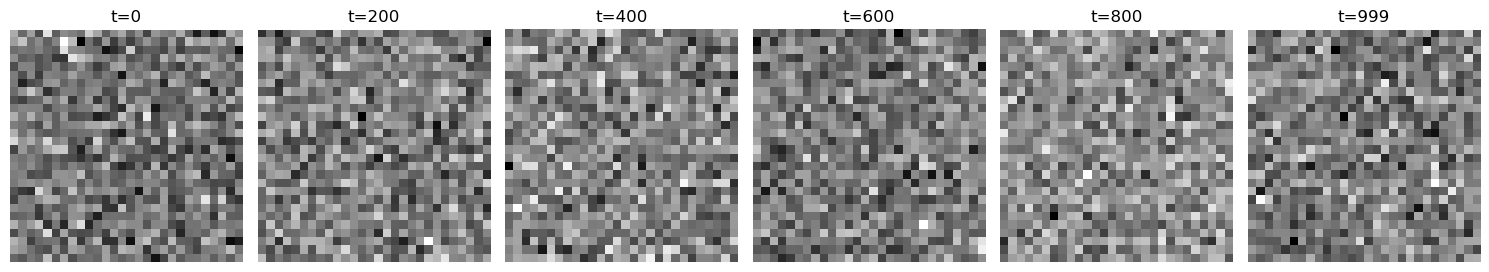

In [7]:
x0 = np.ones((28, 28))  # A simple white square
timesteps_to_view = [0, 200, 400, 600, 800, 999]

plt.figure(figsize=(15, 3))
for i, t in enumerate(timesteps_to_view):
    xt, _ = forward_diffusion_sample(x0, t, alphas_cumprod)
    plt.subplot(1, len(timesteps_to_view), i + 1)
    plt.imshow(xt, cmap='gray')
    plt.title(f"t={t}")
    plt.axis("off")

plt.tight_layout()
plt.show()
